# >>imports

In [1]:
import xarray as xr
     
import numpy as np


import pandas as pd
        
import cartopy.crs as ccrs

import cartopy.feature as cfeature

import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'cartopy'

# >>Importing observation data-CNRM  (training data)

In [34]:
#Data directories
tmxDt = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmax/tasmax_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')
tmnDt = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmin/tasmin_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')


In [35]:
tmxDt=tmxDt.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data
tmnDt=tmnDt.sel(time=slice("1980-01-01","2010-01-01"))                 #daily min data

In [36]:
tmxDt_mean=tmxDt.mean('lat').mean('lon')                                #taking mean along lat lon
tmnDt_mean=tmnDt.mean('lat').mean('lon') 

In [37]:
#conversion of kelvin to celcius

tmxDt_mean = tmxDt_mean - 273
tmxDt_mean.tasmax.attrs['units'] = 'C'



tmnDt_mean = tmnDt_mean - 273
tmnDt_mean.tasmin.attrs['units'] = 'C'


In [38]:
tmnDt_mean

<xarray.Dataset>
Dimensions:      (time: 10959, axis_nbounds: 2)
Coordinates:
    height       float64 ...
  * time         (time) datetime64[ns] 1980-01-01T12:00:00 ... 2010-01-01T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 1979-12-31T23:59:59.9999...
    tasmin       (time) float32 5.689 5.666 6.113 6.128 ... 6.574 6.367 5.829

<b>data is imported, now we can do further analysis </b>


# >>plotting data (extra)

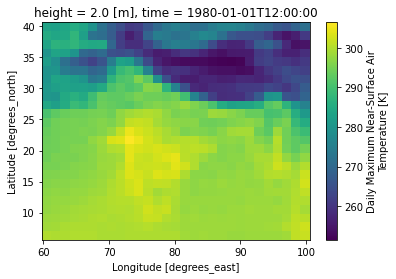

In [7]:
tmxDt.tasmax[0].plot()

In [8]:
#tmxDt.tasmax.data    #to see the temp data

In [8]:
tmxDt.coords["time"]

<xarray.DataArray 'time' (time: 10959)>
array(['1980-01-01T12:00:00.000000000', '1980-01-02T12:00:00.000000000',
       '1980-01-03T12:00:00.000000000', ..., '2009-12-30T12:00:00.000000000',
       '2009-12-31T12:00:00.000000000', '2010-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    height   float64 ...
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2010-01-01T12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds

In [9]:
tmxDt.tasmax.attrs

{'online_operation': 'maximum',
 'cell_methods': 'area: mean time: maximum',
 'interval_operation': '900 s',
 'interval_write': '1 d',
 'standard_name': 'air_temperature',
 'description': 'Daily Maximum Near-Surface Air Temperature',
 'long_name': 'Daily Maximum Near-Surface Air Temperature',
 'history': 'none',
 'units': 'K',
 'cell_measures': 'area: areacella'}

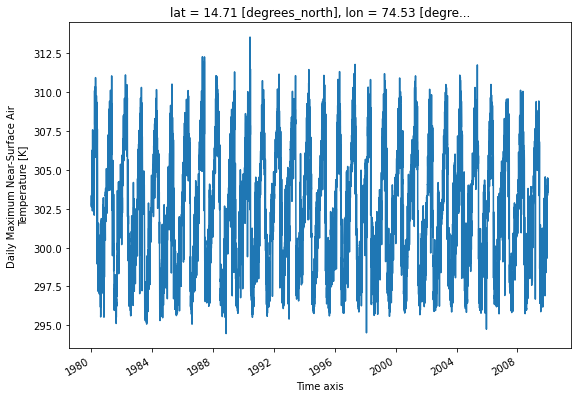

In [10]:
tmxDt.tasmax.isel(lat=6, lon=10).plot(size=6)                  #SELCETION BY INDEX, yaha 6, 10 lat long nahi hai, index no hai

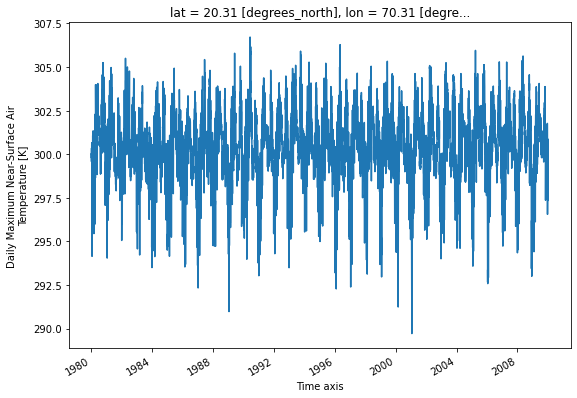

In [11]:
tmxDt.tasmax.sel(lat=20, lon=70, method="nearest").plot(size=6)    #SELCETION BY sel, yaha par nearest method dena parega, kyuki exact value lon lat  me nahi dale hai

In [12]:
tmxDt_5y=tmxDt.tasmax.sel(lat=slice(10,35), lon=slice(70,98)).sel(time=slice("2000-01-01","2005-01-01"))       #checking slice

In [14]:
tmx2=tmxDt.tasmax.sel(time="1980-01-01")   #plotting for a particular year

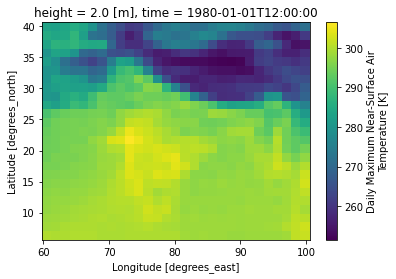

In [15]:
tmx2.plot()

In [16]:
t = tmxDt.sel(lat=slice(10,35), lon=slice(70,98)).sel(time=slice("2000-01-01","2005-01-01")) 

In [17]:
t.coords

Coordinates:
  * lat      (lat) float64 10.51 11.91 13.31 14.71 ... 30.12 31.52 32.92 34.32
  * lon      (lon) float64 70.31 71.72 73.12 74.53 ... 92.81 94.22 95.62 97.03
    height   float64 2.0
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2005-01-01T12:00:00

In [18]:
# g_simple = t.plot.scatter(x='lon', y='lat', col='time', col_wrap=10)

In [19]:
# tmx3=tmxDt.tasmax.sel(time=["1980-01-01","1985-06-01"], method="nearest")   #plotting for a particular years

In [20]:
# tmx3_plot=xr.concat([tmx3,tmx3+50], pd.Index(['normal','hot'], name='checking'))

In [21]:
# tmx3.plot()

In [22]:
# tmxDt.tasmax.sel(lat=20,lon=80, method='nearest').sel(time=slice("1980-01-01","2010-01-01")).plot()

In [23]:
# monthly=tmxDt.resample(time="M").mean()     #monthly mean temperature of particular date

# mData=tmxDt.sel(time='2010-01-01')

# mData.tasmax.plot()

In [24]:
# mData

# >>Statistical operations & Plotting (cnrm)

In [25]:
import seaborn as sns
sns.set()

In [26]:


#Data directories
tmxDt_1 = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmax/tasmax_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')
tmnDt_1 = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmin/tasmin_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')


In [27]:
#conversion of kelvin to celcius

tmxDt_c = tmxDt_1 - 273
tmxDt_c.tasmax.attrs['units'] = 'kelvin'



tmnDt_c = tmnDt_1 - 273
tmnDt_c.tasmin.attrs['units'] = 'kelvin'


In [28]:
tmxDt_c

<xarray.Dataset>
Dimensions:      (lat: 25, lon: 29, time: 22280, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 6.303 7.704 9.105 10.51 ... 37.12 38.52 39.92
  * lon          (lon) float64 60.47 61.88 63.28 64.69 ... 97.03 98.44 99.84
    height       float64 ...
  * time         (time) datetime64[ns] 1950-01-01T12:00:00 ... 2010-12-31T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 1949-12-31T23:59:59.9999...
    tasmax       (time, lat, lon) float32 26.37 26.24 26.12 ... -3.33 -0.6831
Attributes: (12/54)
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-20T08:19:13Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / CMIP...
    activity_id:            CMIP
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/404d17a6-e9d7-43e7-9d93-e2ddc57979a9
    history:                Mon Jul 30 12:06:28 2018: ncatted -O -a tracking_...
    NCO:                    "4.5.5"

In [29]:
tmnDt_c

<xarray.Dataset>
Dimensions:      (lat: 25, lon: 29, time: 22280, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 6.303 7.704 9.105 10.51 ... 37.12 38.52 39.92
  * lon          (lon) float64 60.47 61.88 63.28 64.69 ... 97.03 98.44 99.84
    height       float64 ...
  * time         (time) datetime64[ns] 1950-01-01T12:00:00 ... 2010-12-31T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 1949-12-31T23:59:59.9999...
    tasmin       (time, lat, lon) float32 25.5 25.53 25.36 ... -11.55 -8.87
Attributes: (12/54)
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-20T08:19:11Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / CMIP...
    activity_id:            CMIP
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/afc05ec8-baac-400f-a2cc-a48656ba5997
    history:                Mon Jul 30 12:08:25 2018: ncatted -O -a tracking_...
    NCO:                    "4.5.5"

In [30]:
tmxIn=tmxDt_c.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data
tmnIn=tmnDt_c.sel(time=slice("1980-01-01","2010-01-01"))                 #daily min data

In [31]:
tmxIn_df = tmxIn.to_dataframe().reset_index().set_index('time')

tmnIn_df = tmnIn.to_dataframe().reset_index().set_index('time')

In [32]:
tmxIn_df.shape   #to check the size od our dataset

(15890550, 6)

In [33]:
tmxIn_df.tail()

,lat,lon,axis_nbounds,height,time_bounds,tasmax
time,,,,,,
2009-12-30 12:00:00,39.921816,99.84375,1,2.0,2009-12-30 23:59:59.999999727,-4.483124
2009-12-31 12:00:00,39.921816,99.84375,0,2.0,2009-12-30 23:59:59.999999727,-9.131805
2009-12-31 12:00:00,39.921816,99.84375,1,2.0,2009-12-31 23:59:59.999999727,-9.131805
2010-01-01 12:00:00,39.921816,99.84375,0,2.0,2009-12-31 23:59:59.999999727,-8.239075
2010-01-01 12:00:00,39.921816,99.84375,1,2.0,2010-01-01 23:59:59.999999727,-8.239075


In [34]:
tmxIn_df['tasmax'].head()            #to see specific column, here tasmax

time
1980-01-01 12:00:00    26.785034
1980-01-01 12:00:00    26.785034
1980-01-02 12:00:00    26.606628
1980-01-02 12:00:00    26.606628
1980-01-03 12:00:00    25.914612
Name: tasmax, dtype: float32

In [35]:
tmxIn_df[['lat', 'lon', 'tasmax']].head()            #to see multiple columns

,lat,lon,tasmax
time,,,
1980-01-01 12:00:00,6.303454,60.46875,26.785034
1980-01-01 12:00:00,6.303454,60.46875,26.785034
1980-01-02 12:00:00,6.303454,60.46875,26.606628
1980-01-02 12:00:00,6.303454,60.46875,26.606628
1980-01-03 12:00:00,6.303454,60.46875,25.914612


In [36]:
tmxIn_df.describe()             #different statistical operation with bulk data

,lat,lon,axis_nbounds,height,tasmax
count,1.589055e+07,1.589055e+07,15890550.0,15890550.0,1.589055e+07
mean,2.311265e+01,8.015625e+01,0.5,2.0,2.093883e+01
std,1.010106e+01,1.176553e+01,0.5,0.0,1.453908e+01
min,6.303454e+00,6.046875e+01,0.0,2.0,-3.936726e+01
25%,1.470806e+01,7.031250e+01,0.0,2.0,1.515205e+01
50%,2.311266e+01,8.015625e+01,0.5,2.0,2.633688e+01
75%,3.151724e+01,9.000000e+01,1.0,2.0,2.851932e+01
max,3.992182e+01,9.984375e+01,1.0,2.0,5.069489e+01


In [37]:
tmxIn_df[['lat', 'lon', 'tasmax']].describe()            #to see multiple columns

,lat,lon,tasmax
count,1.589055e+07,1.589055e+07,1.589055e+07
mean,2.311265e+01,8.015625e+01,2.093883e+01
std,1.010106e+01,1.176553e+01,1.453908e+01
min,6.303454e+00,6.046875e+01,-3.936726e+01
25%,1.470806e+01,7.031250e+01,1.515205e+01
50%,2.311266e+01,8.015625e+01,2.633688e+01
75%,3.151724e+01,9.000000e+01,2.851932e+01
max,3.992182e+01,9.984375e+01,5.069489e+01


In [38]:
# Add column for hour of day 
tmxIn_df['hour'] = tmxIn_df.index.hour

# And month
tmxIn_df['month'] = tmxIn_df.index.month

# And day of year
tmxIn_df['yearday'] = tmxIn_df.index.dayofyear

In [39]:
# Calculate the hourly mean
yearday_tasmax = tmxIn_df.tasmax.groupby(tmxIn_df.yearday).mean()

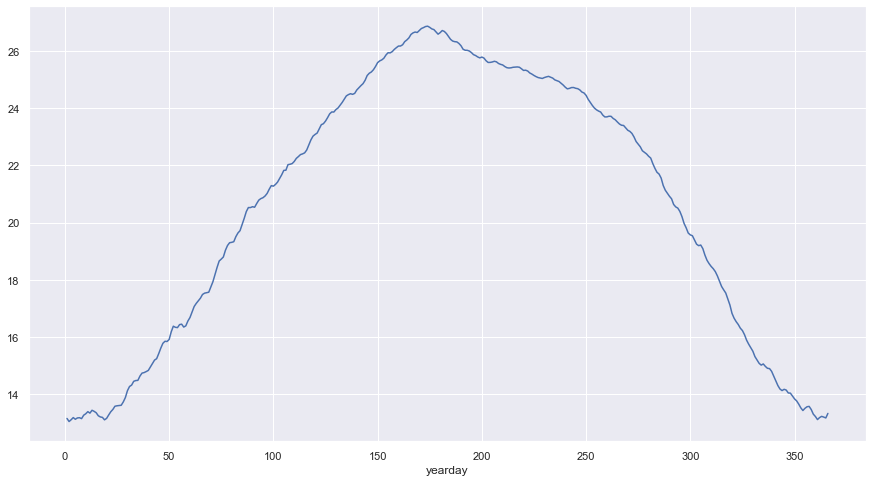

In [40]:
yearday_tasmax.plot(figsize=(15,8))
plt.show()

In [41]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

In [42]:
yearday_tasmax = tmxIn_df.tasmax.groupby(tmxIn_df.yearday).agg([q1, q2, q3, np.mean])

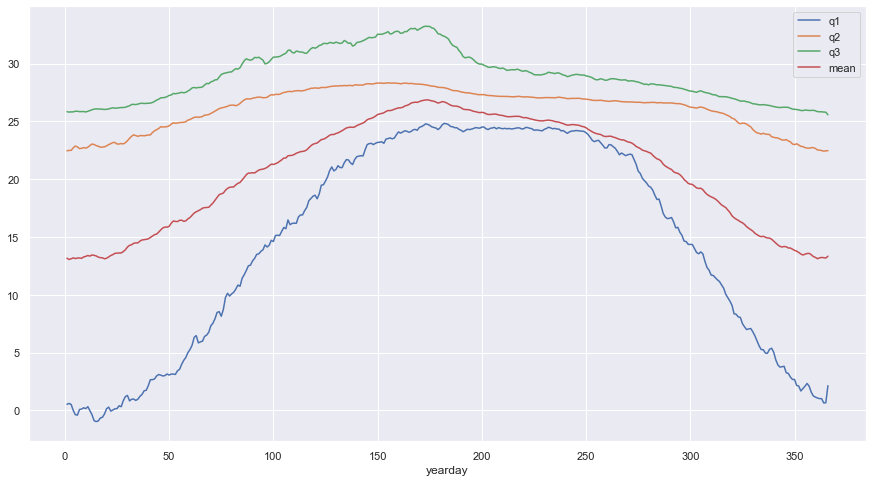

In [43]:
# Quick plot
yearday_tasmax.plot(figsize=(15,8))
plt.show()

# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/YEARLY DEVIATION-YEARDAY.jpeg', dpi = 300)

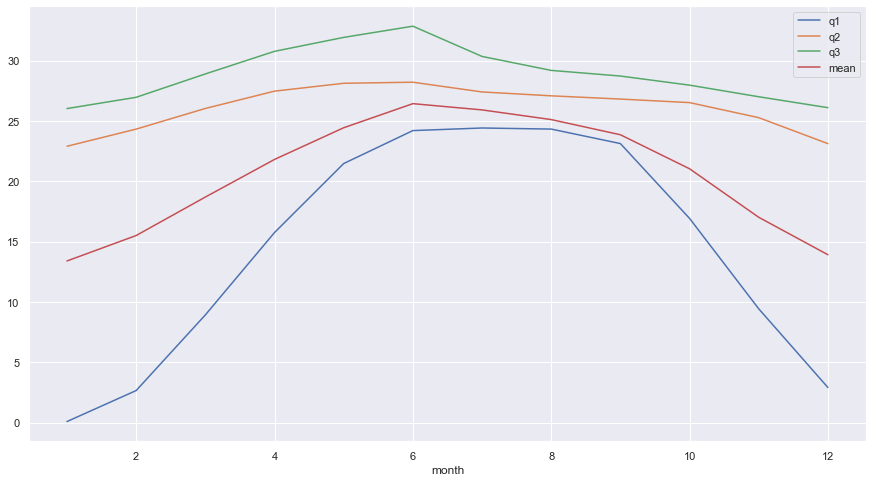

In [44]:
# Calculate the average
monthly_tasmax = tmxIn_df.tasmax.groupby(tmxIn_df.month).agg([q1, q2, q3, np.mean])

# Quick Plot
monthly_tasmax.plot(figsize=(15,8))
plt.show()
# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/YEARLY DEVIATION-MONTH.jpeg', dpi = 300)

In [45]:
# Monthly climatology
monthly_climatology = tmxIn_df.groupby(tmxIn_df.index.month).mean()
monthly_climatology

,lat,lon,axis_nbounds,height,tasmax,hour,month,yearday
time,,,,,,,,
1,23.112648,80.15625,0.5,2.0,13.392730,12.0,1.0,15.983888
2,23.112648,80.15625,0.5,2.0,15.500566,12.0,2.0,45.636792
3,23.112648,80.15625,0.5,2.0,18.688040,12.0,3.0,75.266667
4,23.112648,80.15625,0.5,2.0,21.804550,12.0,4.0,105.766667
5,23.112648,80.15625,0.5,2.0,24.430889,12.0,5.0,136.266667
6,23.112648,80.15625,0.5,2.0,26.426847,12.0,6.0,166.766667
7,23.112648,80.15625,0.5,2.0,25.909771,12.0,7.0,197.266667
8,23.112648,80.15625,0.5,2.0,25.107983,12.0,8.0,228.266667
9,23.112648,80.15625,0.5,2.0,23.851135,12.0,9.0,258.766667


In [46]:
# Annual Cycle by Day

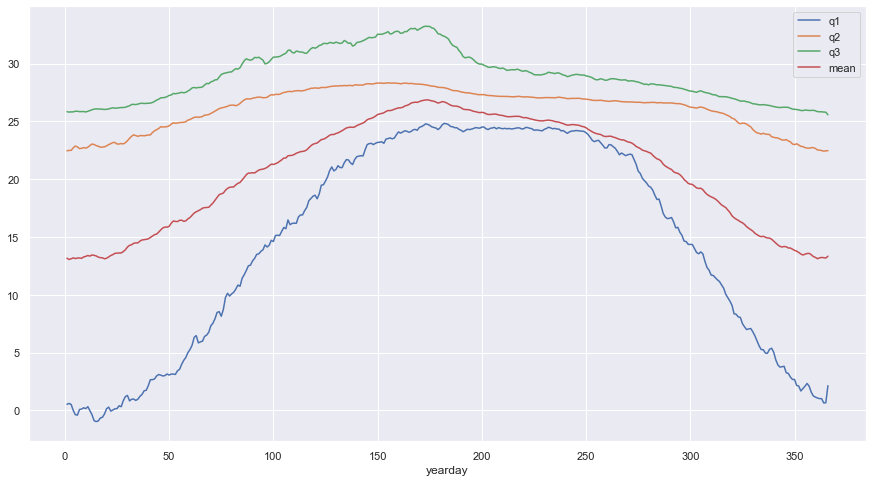

In [47]:
# Calculate the average
daily_tasmax = tmxIn_df.tasmax.groupby(tmxIn_df.yearday).agg([q1, q2, q3, np.mean])

# Quick Plot

daily_tasmax.plot(figsize=(15,8))
plt.show()


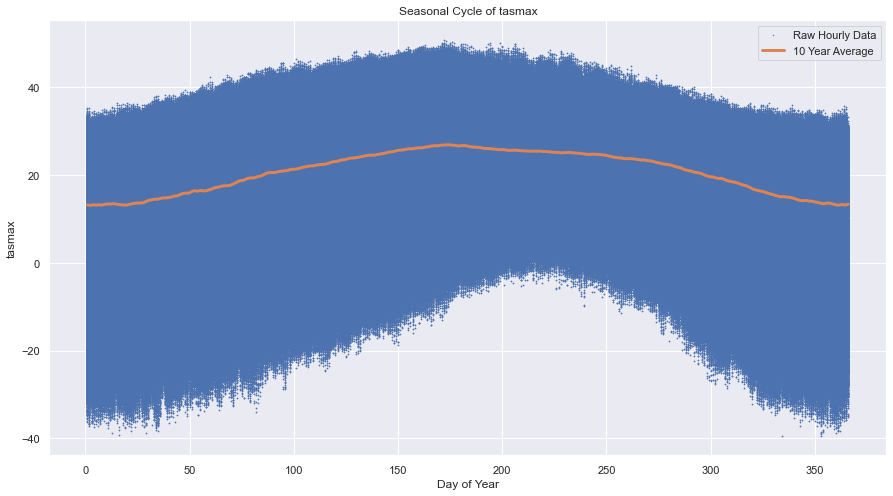

In [48]:
# Pretty plot of data by Yearday
plt.figure(figsize=(15,8))
plt.plot(tmxIn_df.yearday,tmxIn_df.tasmax,'.',markersize=1,label='Raw Hourly Data');
plt.plot(daily_tasmax.index,daily_tasmax['mean'], linewidth=3,label='10 Year Average')

plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('tasmax')
plt.title('Seasonal Cycle of tasmax');

plt.show()

# plt.savefig('NDBC_44025_Seasonal_SST.png');

In [49]:
a = tmxIn_df.groupby([tmxIn_df.index.year,tmxIn_df.index.month]).mean()
a

lat       lon  axis_nbounds  height     tasmax  hour  month  \
time time                                                                      
1980 1     23.112648  80.15625           0.5     2.0  14.030607  12.0    1.0   
     2     23.112648  80.15625           0.5     2.0  15.828400  12.0    2.0   
     3     23.112648  80.15625           0.5     2.0  17.017012  12.0    3.0   
     4     23.112648  80.15625           0.5     2.0  21.699181  12.0    4.0   
     5     23.112648  80.15625           0.5     2.0  25.017799  12.0    5.0   
...              ...       ...           ...     ...        ...   ...    ...   
2009 9     23.112648  80.15625           0.5     2.0  23.879959  12.0    9.0   
     10    23.112648  80.15625           0.5     2.0  20.876768  12.0   10.0   
     11    23.112648  80.15625           0.5     2.0  16.955257  12.0   11.0   
     12    23.112648  80.15625           0.5     2.0  14.748624  12.0   12.0   
2010 1     23.112648  80.15625           0.5     2.0  14.963394  12.0    1.0   

           yearday  
time time           
1980 1        16.0  
     2        46.0  
     3        76.0  
     4       106.5  
     5       137.0  
...            ...  
2009 9       258.5  
     10      289.0  
     11      319.5  
     12      350.0  
2010 1         1.0  

[361 rows x 8 columns]

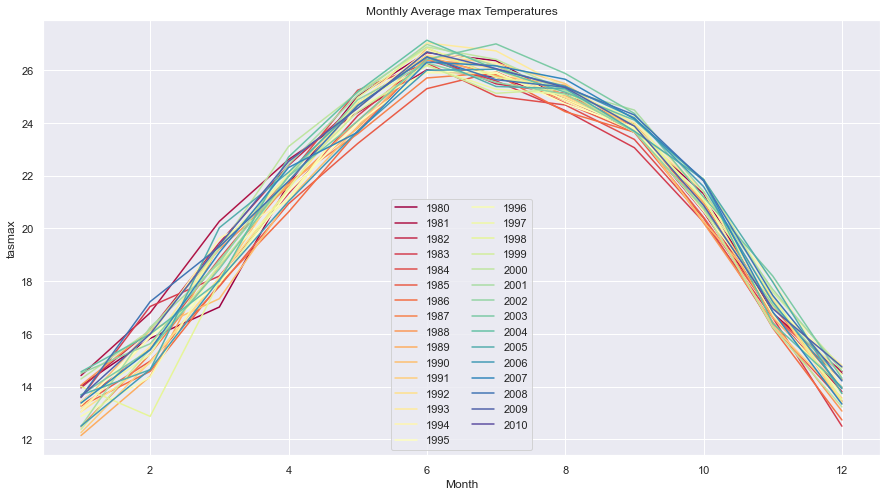

In [50]:
# A crude plot
a.tasmax.unstack(0).plot(figsize=(15,8),cmap='Spectral');
plt.xlabel('Month')
plt.ylabel('tasmax')
plt.title('Monthly Average max Temperatures')
plt.legend(loc='lower center', ncol=2);
plt.show()

# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/CRUDE PLOT-TASMAX.jpeg', dpi = 300)

In [51]:
#Climatic Summary Boxplots
# Let's make our plots pretty
import seaborn as sns
sns.set()

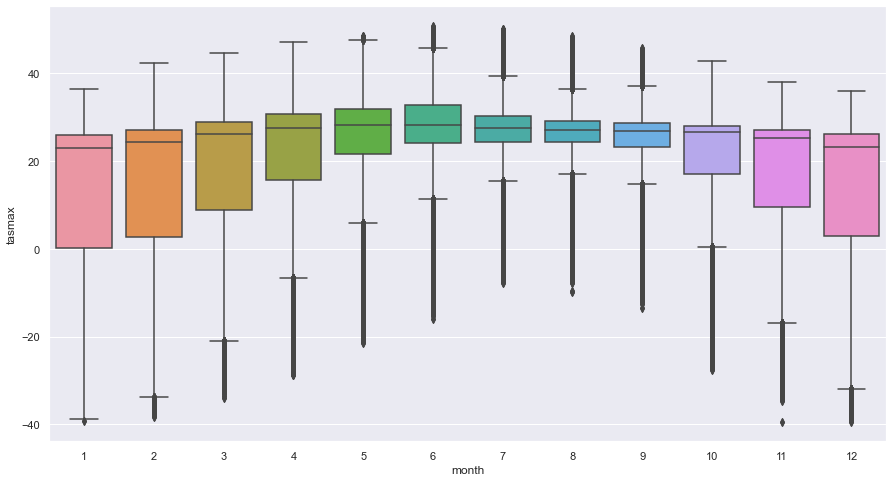

In [52]:
# Monthly

fig, ax=plt.subplots(figsize=(15,8))

sns.boxplot(data = tmxIn_df, x='month', y='tasmax', ax=ax)

plt.show()
# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/MONTHLY BOXPLOT.jpeg', dpi = 300)

About Boxplot: 

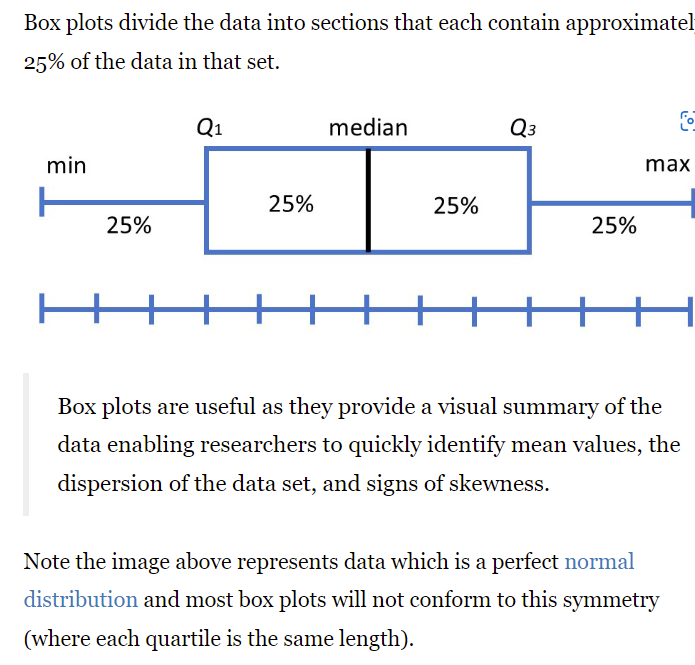
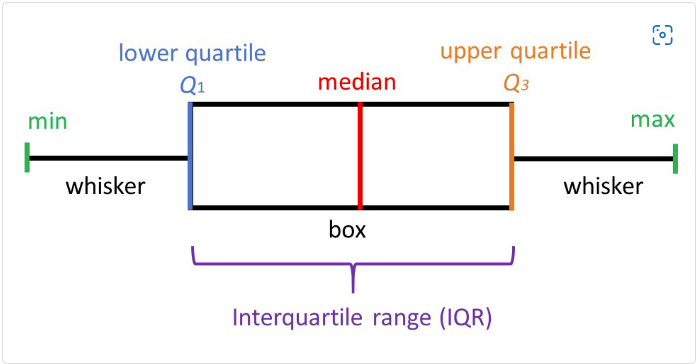

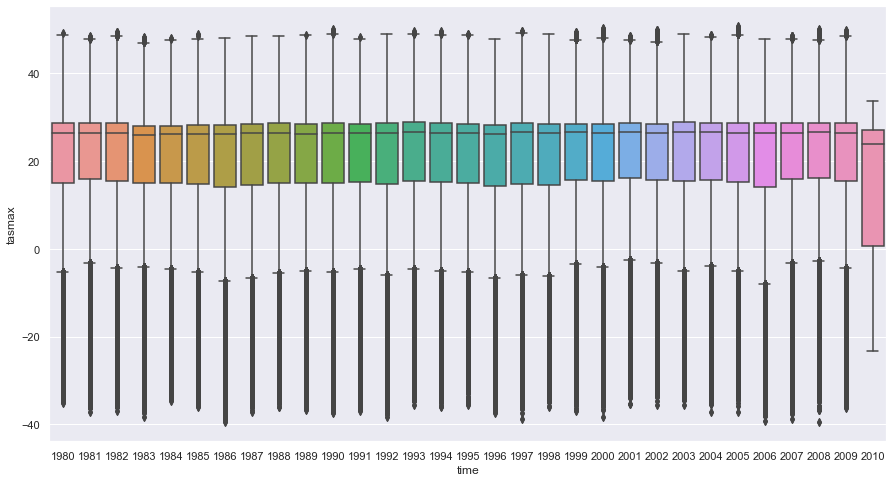

In [53]:
# Yearly
fig, ax=plt.subplots(figsize=(15,8))

sns.boxplot(data = tmxIn_df, x=tmxIn_df.index.year, y='tasmax', ax=ax)

plt.show()
# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/YEARLY BOXPLOT.jpeg', dpi = 300)

# >>PLOTTING DAILY(D), MONTHLY(M), AND ANNUAL(A) DATA TIME SERIES FOR TEMP :CNRM

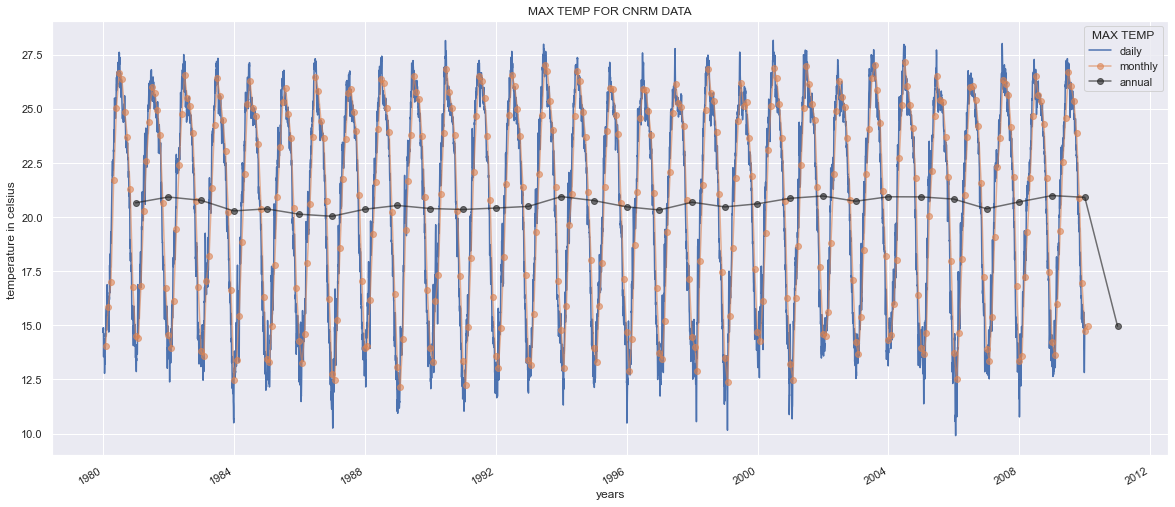

In [54]:
# PLOTTING DAILY(D), MONTHLY(M), AND ANNUAL(A) DATA TIME SERIES FOR MAX TEMP

tmxDt_mean.tasmax.plot(figsize=(20,8), label='daily')               #daily data                           

tmxDt_mean.tasmax.resample(time='M').mean('time').plot(marker='o', alpha=0.6, label='monthly')          

tmxDt_mean.tasmax.resample(time='A').mean('time').plot(marker='o', alpha=0.6, color='k', label='annual')

plt.legend(title= 'MAX TEMP')
plt.title('MAX TEMP FOR CNRM DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius ')
plt.show()

# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/Max_daily_mon_annual_cnrm.jpeg', dpi = 300)



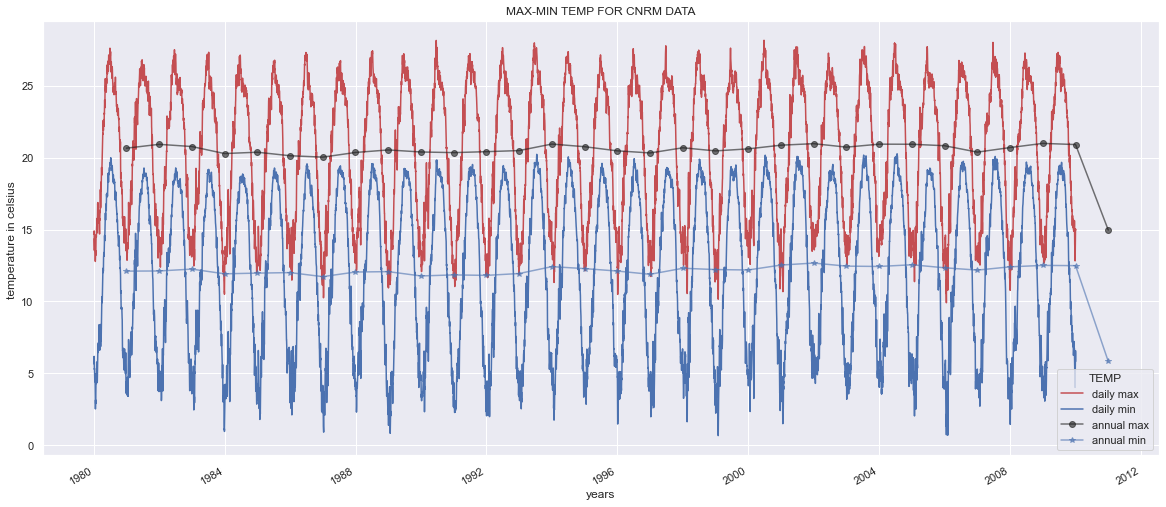

In [55]:

#for max/min temp


tmxDt_mean.tasmax.plot(figsize=(20,8), label='daily max',color='r' )                                                        #daily data
tmnDt_mean.tasmin.plot( label='daily min',color='b')


# tmxDt_mean.tasmax.resample(time='M').mean('time').plot(marker='o', alpha=0.6)                                             #monthly data 
# tmnDt_mean.tasmin.resample(time='M').mean('time').plot(marker='*', alpha=0.6 )


tmxDt_mean.tasmax.resample(time='A').mean('time').plot(marker='o', alpha=0.6, color='k', label='annual max')                 #annual data
tmnDt_mean.tasmin.resample(time='A').mean('time').plot(marker='*', alpha=0.6, color='b', label='annual min')



plt.legend(title= 'TEMP')
plt.title('MAX-MIN TEMP FOR CNRM DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius ')

plt.show()
#plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/Max_min_daily_annual_cnrm.jpeg', dpi = 300)

# >> using numpy to do similar things (extra)

In [56]:
tmnDt_mean=tmnDt.mean('lat').mean('lon')                                    #taking mean along lat lon

In [57]:
tmxMean=tmxDt_mean.tasmax.to_numpy()                                 #converting to numpy array

In [58]:
tmnMean=tmnDt_mean.tasmin.to_numpy()

In [59]:
tmnMean

array([278.68893, 278.66595, 279.11282, ..., 279.57385, 279.36725,
       278.8287 ], dtype=float32)

In [60]:
time_ = tmnDt["time"].to_numpy()

In [61]:
type(time_)

numpy.ndarray

[Text(0.5, 0, 'X Values'),
 Text(0, 0.5, 'Y Values'),
 Text(0.5, 1.0, 'min temp')]

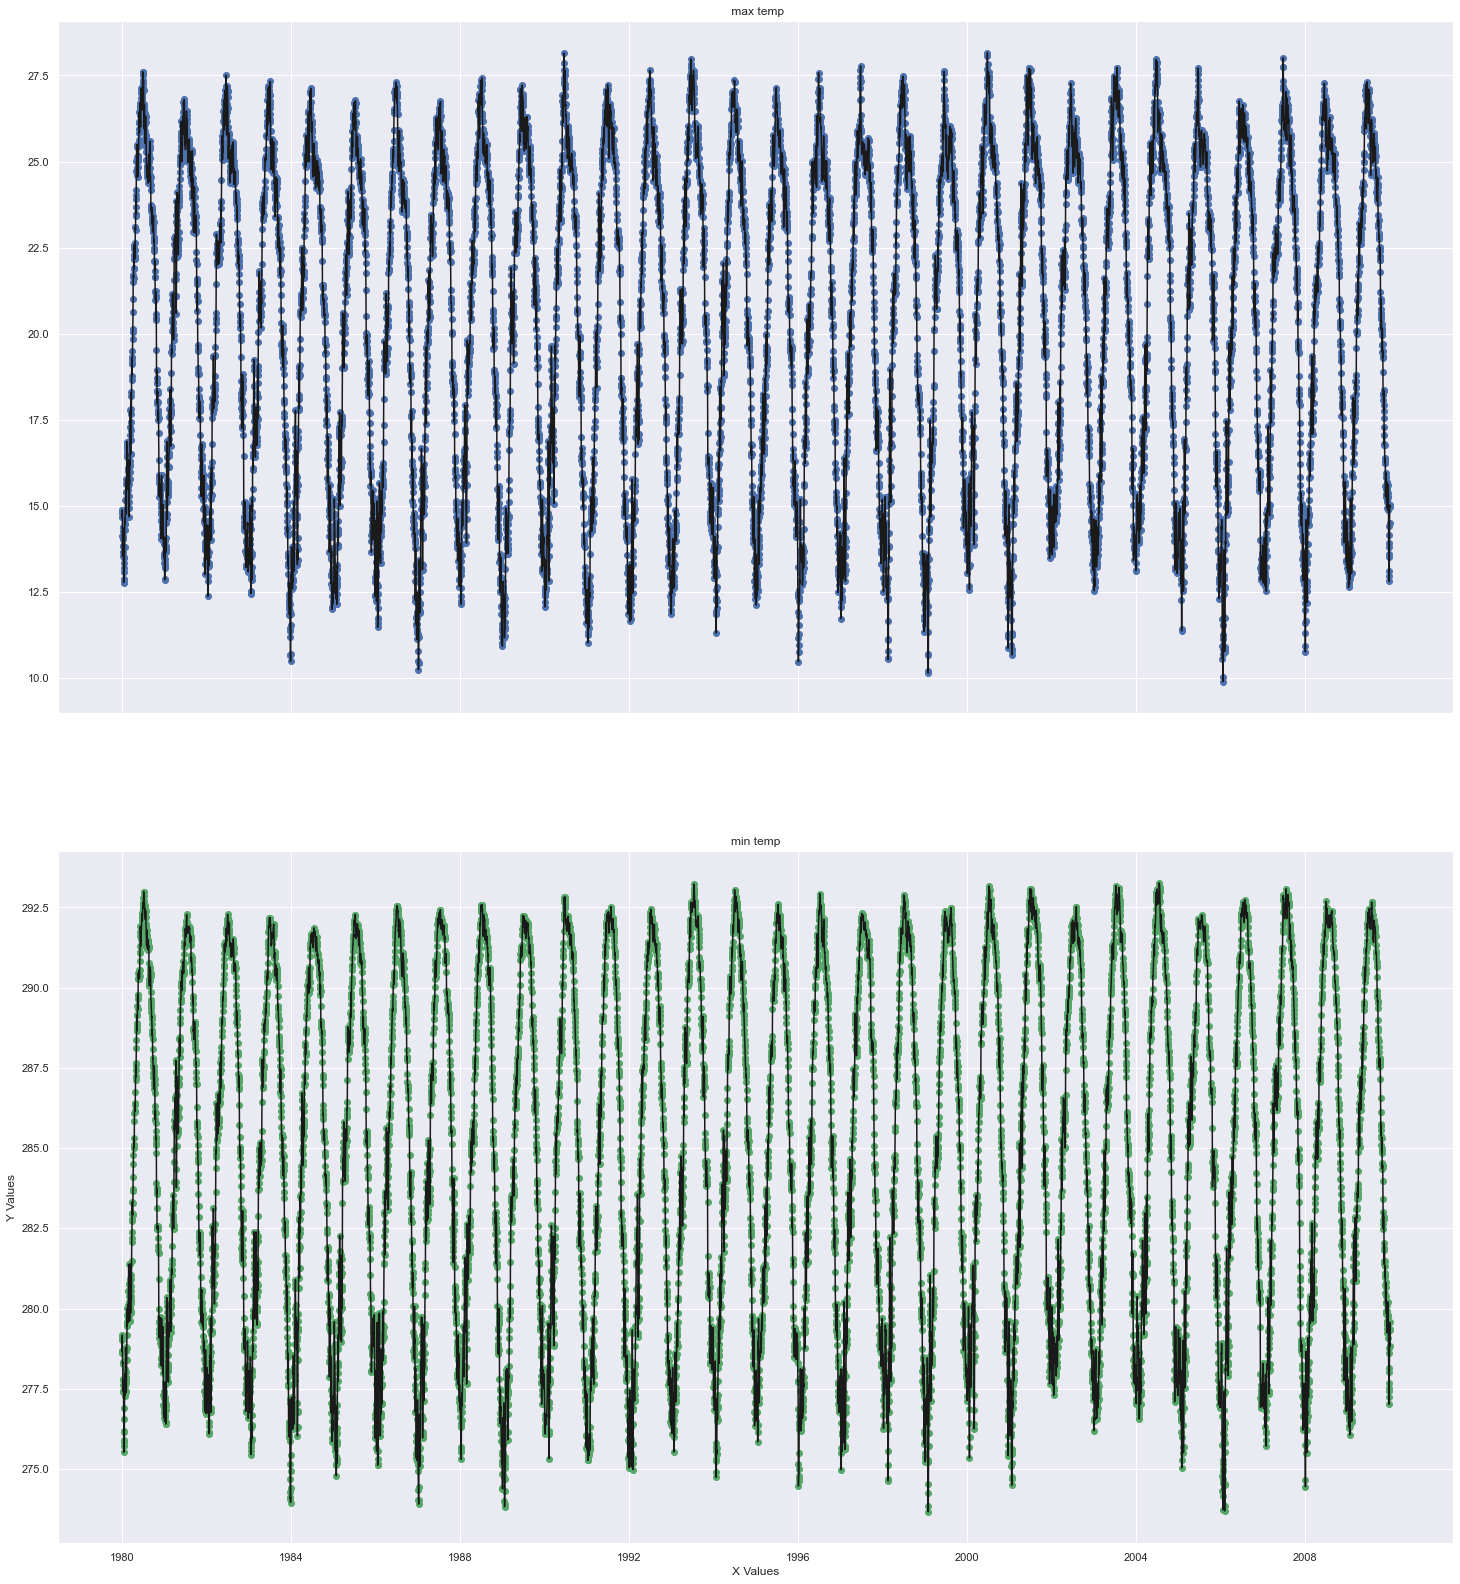

In [62]:
# X= np.linspace(0,2*pi,80)

fig, ax = plt.subplots(2, 
           sharex='col', sharey='row', figsize=(25,28))

ax[0].plot(time_, tmxMean, 'bo', time_, tmxMean, 'k')
ax[0].set(title=' max temp')

ax[1].plot(time_, tmnMean, 'go', time_, tmnMean, 'k')
ax[1].set(xlabel='X Values', ylabel='Y Values',
       title='min temp')

In [63]:
tmxMean=tmxDt_mean.tasmax.to_numpy()                                 #converting to numpy array

In [64]:
tmnMean=tmnDt_mean.tasmin.to_numpy()

In [65]:

time_ = tmnDt["time"].to_numpy()

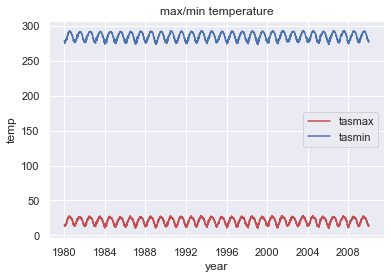

In [66]:

plt.plot(time_, tmxMean,'r', label='tasmax')
plt.plot(time_, tmnMean,'b',label='tasmin')

plt.xlabel('year')
plt.ylabel('temp')
plt.title('max/min temperature')
plt.legend()


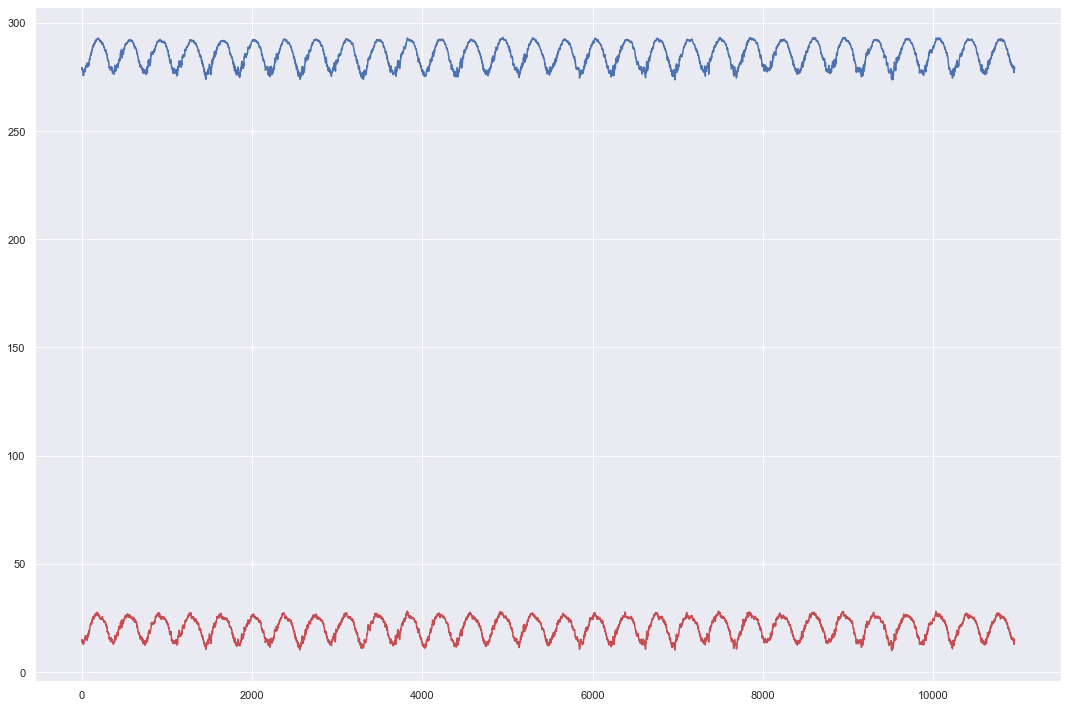

In [67]:
fig, axes = plt.subplots(figsize=(15,10))             #figure means the container holding the plots, and axes are the plots


# y1=tmxDt_mean.tasmax()
# y2=tmnDt_mean.tasmin()

axes.plot(tmxMean, label='daily', color='r' )

axes.plot(tmnMean, label='daily', color='b')

plt.tight_layout()

plt.show()




# >>Importing observation data-IMD

In [17]:
#Data directories

tmxDt_ob = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/IMD DATA/IMD_TMAX_1951_2018.nc')
tmnDt_ob = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/IMD DATA/IMD_TMIN_1951_2018.nc')


In [18]:
tmxDt_ob=tmxDt_ob.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data
tmnDt_ob=tmnDt_ob.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data

In [19]:
tmxDt_mean_ob=tmxDt_ob.mean('lat').mean('lon')                                #taking mean along lat lon
tmnDt_mean_ob=tmnDt_ob.mean('lat').mean('lon') 

# >>PLOTTING DAILY(D), MONTHLY(M), AND ANNUAL(A) DATA TIME SERIES FOR TEMP :IMD

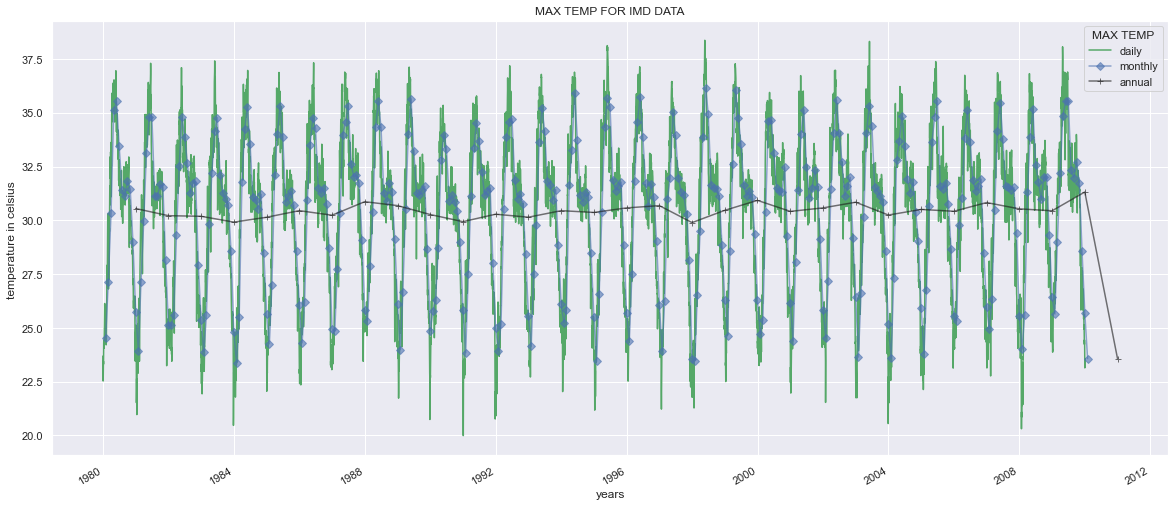

In [71]:
# PLOTTING DAILY(D), MONTHLY(M), AND ANNUAL(A) DATA TIME SERIES FOR MAX TEMP

tmxDt_mean_ob.tmax.plot(figsize=(20,8),color='g', label='daily')               #daily data                           

tmxDt_mean_ob.tmax.resample(time='M').mean('time').plot(marker='D', alpha=0.6, label='monthly')          

tmxDt_mean_ob.tmax.resample(time='A').mean('time').plot(marker='+', alpha=0.6, color='k', label='annual')

plt.legend(title= 'MAX TEMP')
plt.title('MAX TEMP FOR IMD DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius ')
plt.show()
# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/Max_daily_mon_annual_IMD.jpeg', dpi = 300)



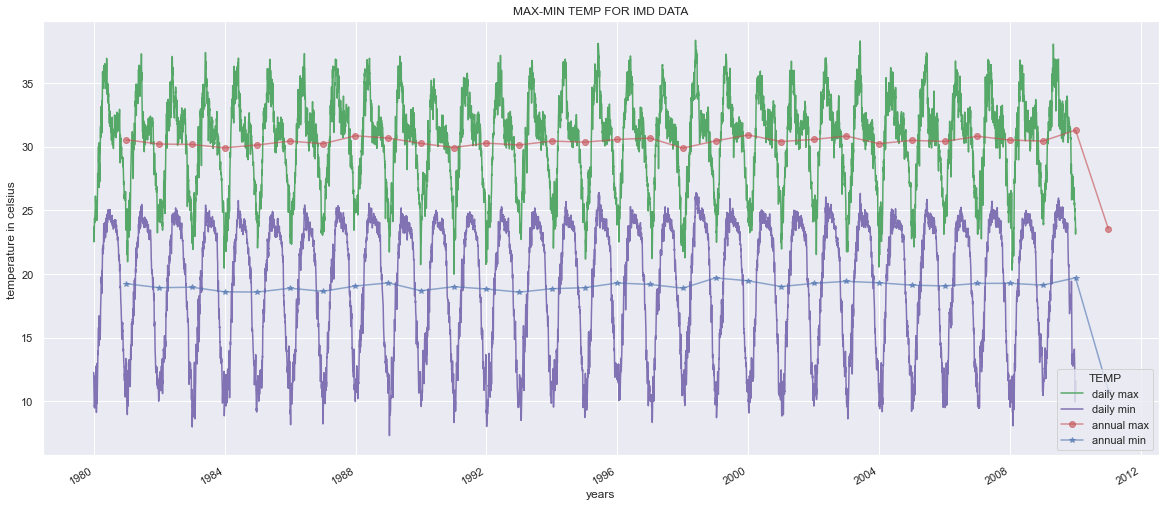

In [72]:

#for max/min temp


tmxDt_mean_ob.tmax.plot(figsize=(20,8), label='daily max',color='g' )                                                        #daily data
tmnDt_mean_ob.tmin.plot( label='daily min',color='m')


# tmxDt_mean_ob.tmax.resample(time='M').mean('time').plot(marker='o', alpha=0.6)                                             #monthly data 
# tmnDt_mean_ob.tmin.resample(time='M').mean('time').plot(marker='*', alpha=0.6 )


tmxDt_mean_ob.tmax.resample(time='A').mean('time').plot(marker='o', alpha=0.6, color='r', label='annual max')                 #annual data
tmnDt_mean_ob.tmin.resample(time='A').mean('time').plot(marker='*', alpha=0.6, color='b', label='annual min')



plt.legend(title= 'TEMP')
plt.title('MAX-MIN TEMP FOR IMD DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius ')
plt.show()
#plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/Max_min_daily_annual_IMD.jpeg', dpi = 300)

# >>COMPARISON PLOTS: CNRM VS IMD

**(1) MONTHLY DATA**

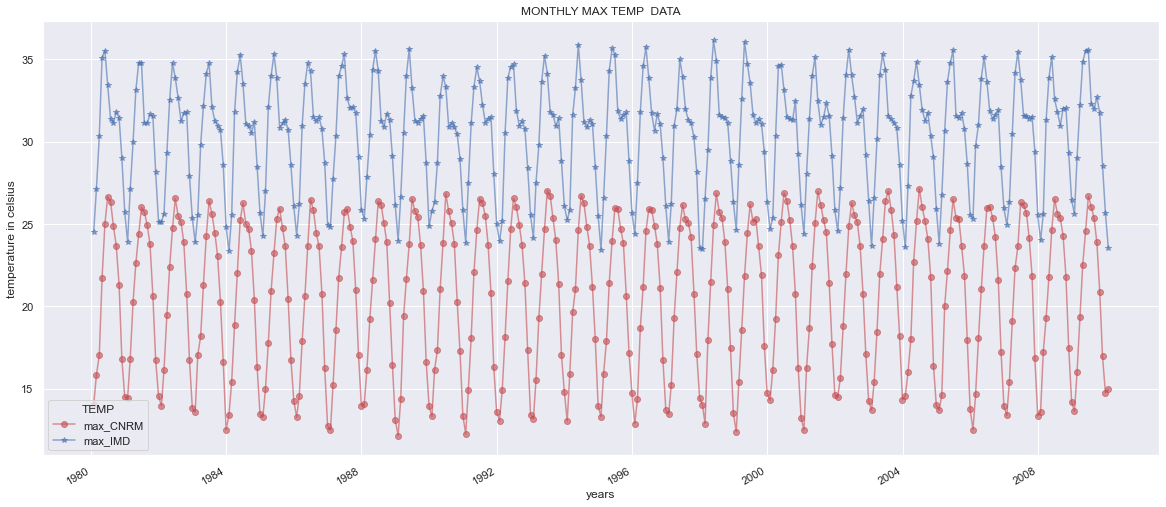

In [73]:
              
tmxDt_mean.tasmax.resample(time='M').mean('time').plot(figsize=(20,8),alpha=0.6,marker='o', color='r',label='max_CNRM')

tmxDt_mean_ob.tmax.resample(time='M').mean('time').plot(alpha=0.6,marker='*', color='b',label='max_IMD') 

plt.legend(title= 'TEMP')
plt.title('MONTHLY MAX TEMP  DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius')
plt.show()
# plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/MONTHLY MAX TEMP  DATA.jpeg', dpi = 300)

#learn to show  values !!!!!!!!!!!!!!!!!




**(2) YEARLY DATA**

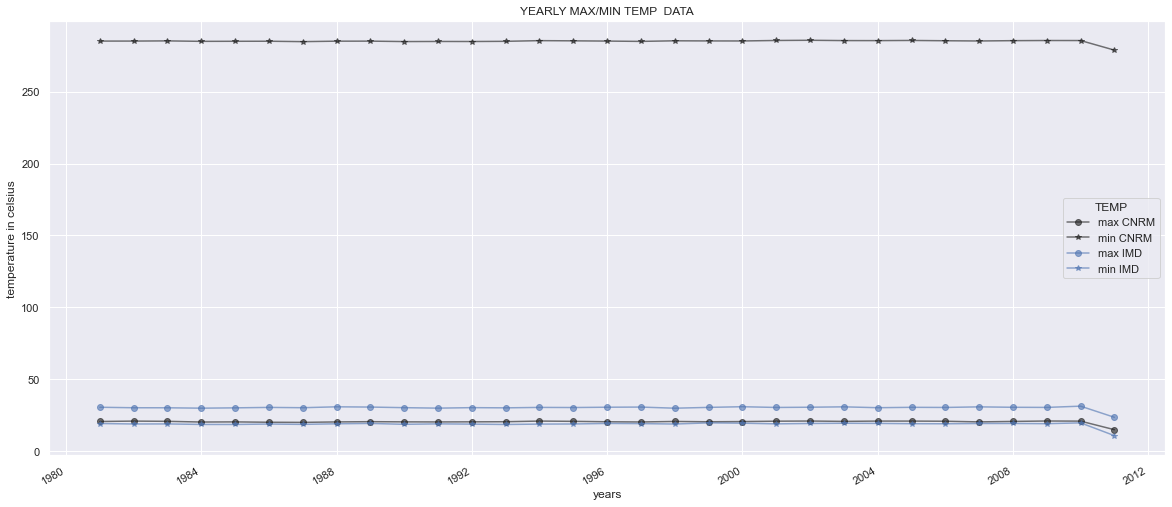

In [74]:
tmxDt_mean.tasmax.resample(time='A').mean('time').plot(figsize=(20,8),marker='o', alpha=0.6, color='k', label='max CNRM')         #annual MAX data CNRM 
tmnDt_mean.tasmin.resample(time='A').mean('time').plot(marker='*', alpha=0.6, color='k', label='min CNRM')                  #annual MIN data CNRM 

tmxDt_mean_ob.tmax.resample(time='A').mean('time').plot(marker='o', alpha=0.6, color='b', label='max IMD')                        #annual MAX data IMD
tmnDt_mean_ob.tmin.resample(time='A').mean('time').plot(marker='*', alpha=0.6, color='b', label='min IMD')                 #annual MIN data IMD

plt.legend(title= 'TEMP')
plt.title('YEARLY MAX/MIN TEMP  DATA')
plt.xlabel('years')
plt.ylabel('temperature in celsius')
# plt.show()
plt.savefig('D:/ANURAG KASHYAP/ICWaR/REPORTS/YEARLY MAX-MIN TEMP  DATA.jpeg', dpi = 300)

# >>DEVIATIONS

# >>BIAS CORRECTION

In [77]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend              

In [76]:
def quantile_correction(obs_data, mod_data, sce_data, modified=True):
    cdf = ECDF(mod_data)
    p = cdf(sce_data) * 100
    cor = np.subtract(*[np.nanpercentile(x, p) for x in [obs_data, mod_data]])
    if modified:
        mid = np.subtract(*[np.nanpercentile(x, 50) for x in [obs_data, mod_data]])
        g = np.true_divide(*[np.nanpercentile(x, 50) for x in [obs_data, mod_data]])

        iqr_obs_data = np.subtract(*np.nanpercentile(obs_data, [75, 25]))
        iqr_mod_data = np.subtract(*np.nanpercentile(mod_data, [75, 25]))

        f = np.true_divide(iqr_obs_data, iqr_mod_data)
        cor = g * mid + f * (cor - mid)
        return sce_data + cor
    else:
        return sce_data + cor

# >>scikit ds

## (1)importing tools

In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  # sklearn


import seaborn as sns


import python_utils

# from python_utils import get_sample_data


sns.set(style='darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (2) data

In [55]:
#CNRM DATA
tmxDt = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmax/tasmax_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')
tmnDt = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/CNRM-CM6-1/tasmin/tasmin_day_CNRM-CM6-1_historical_r1i1p1f2_gr_19500101-20101231_v20180917.nc')




In [56]:
tmxD=tmxDt.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data
tmnD=tmnDt.sel(time=slice("1980-01-01","2010-01-01"))                 #daily min data

In [57]:
# imd data



tmxDt_ob = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/IMD DATA/IMD_TMAX_1951_2018.nc')
tmnDt_ob = xr.open_dataset('D:/ANURAG KASHYAP/ICWaR/NEWDATA/IMD DATA/IMD_TMIN_1951_2018.nc')


In [58]:
tmxD_ob=tmxDt_ob.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data
tmnD_ob=tmnDt_ob.sel(time=slice("1980-01-01","2010-01-01"))                 #daily max data

In [46]:
# #conversion of kelvin to celcius

# tmxD_c = tmxDt - 273
# tmxDt_mean.tasmax.attrs['units'] = 'C'

# tmxD_c

# tmnDt_mean = tmnDt_mean - 273
# tmnDt_mean.tasmin.attrs['units'] = 'C'


In [64]:
# load sample data
# training = tmxD
# targets = tmxD_ob

# print a table of the training/targets data


display(pd.concat({'tmxD', 'tmxD_ob'}, axis=1))

# # make a plot of the temperature and precipitation data
# fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 6), sharex=True)
# time_slice = slice('1990-01-01', '1990-12-31')

# # plot-temperature
# training[time_slice]['tmax'].plot(ax=axes[0], label='training')
# targets[time_slice]['tmax'].plot(ax=axes[0], label='targets')
# axes[0].legend()
# axes[0].set_ylabel('Temperature [C]')

# # plot-precipitation
# training[time_slice]['pcp'].plot(ax=axes[1])
# targets[time_slice]['pcp'].plot(ax=axes[1])
# _ = axes[1].set_ylabel('Precipitation [mm/day]')

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid